## Notebook Imports and Packages.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from math import log
%matplotlib inline

# Example 1
### $$f(x) = x^2 + x + 1$$

In [6]:
def f(x):
    return x**2 + x + 1

In [7]:
x_1 = np.linspace(start=-3, stop=3, num=500)

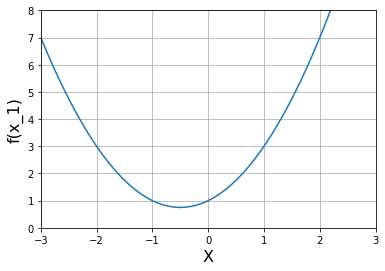

In [8]:
# plot
plt.xlim([-3, 3])
plt.xlabel("X", fontsize=16)
plt.ylim([0, 8])
plt.ylabel("f(x_1)", fontsize=16) 
plt.plot(x_1, f(x_1))
plt.grid()
plt.show()

## Slope & Derivative


In [9]:
def df(x):
    return 2*x +1

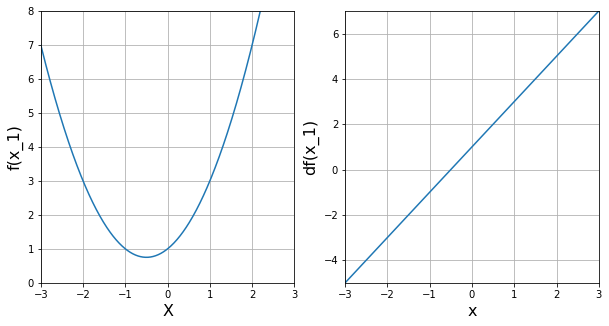

In [10]:
plt.figure(figsize=[10, 5])

# plot 1
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.xlabel("X", fontsize=16)
plt.ylim([0, 8])
plt.ylabel("f(x_1)", fontsize=16) 
plt.plot(x_1, f(x_1))
plt.grid()


#plot 2
plt.subplot(1, 2, 2)
plt.xlim([-3, 3])
plt.xlabel("x", fontsize=16)
plt.ylim([-5, 7])
plt.ylabel("df(x_1)", fontsize=16) 
plt.plot(x_1, df(x_1))
plt.grid()
plt.show()



In [11]:
# gradient descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500): 
    previous_x = new_x
    gradient = df(previous_x)
    new_x =  previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df)
    if step_size < precision:
        print('loop ran :', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is :', f(new_x))

loop ran : 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is : 0.7500000015970362


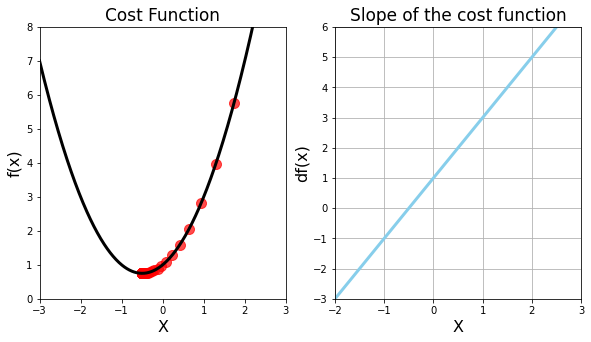

In [12]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_1, f(x_1), color='black', linewidth=3)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)


# Example 2 - Multiple Minima vs Initial Guess & Adanced Function
## $$ g(x) = x^4 - 4x^2 + 5 $$

In [13]:
# Make some data 
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python?
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

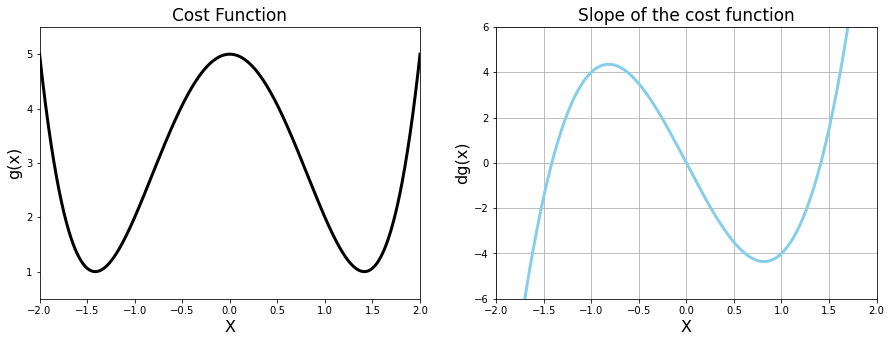

In [14]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_2, g(x_2), color='black', linewidth=3)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)


## Gradeint Descent as a Python Function.

In [15]:
# gradient descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    

    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter): 
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x =  previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            print('loop ran :', n)
            break
    return new_x, x_list, slope_list 

In [16]:
local_min, list_x , deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))
print(deriv_list)

loop ran : 21
Local min occurs at: 1.4122375085019094
Number of steps: 23
[-3.5, -3.8192280000000003, -4.090804992865673, -4.28101536091076, -4.354578365531026, -4.282421444451021, -4.051598563176713, -3.6735673285555963, -3.1857250720349457, -2.6433236120211516, -2.104434974726992, -1.6152659372766287, -1.202412537744527, -0.873464804002376, -0.6227248545552868, -0.4378278315755093, -0.3047432723604011, -0.21059778304298504, -0.14480757312219872, -0.09922306419313287, -0.06782466501976359, -0.04628538792876746, -0.03155062633818417]


loop ran : 32


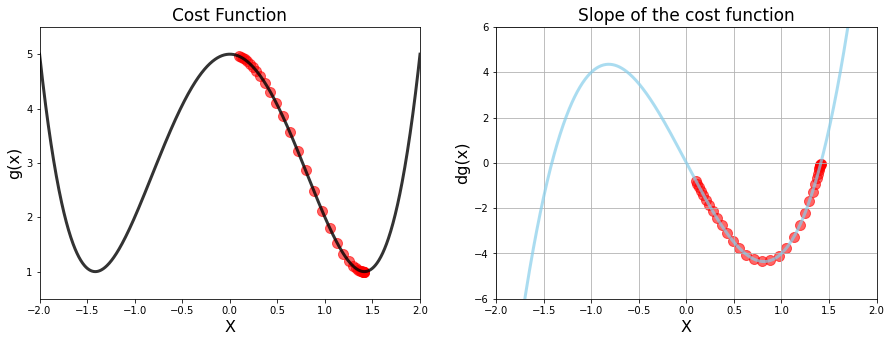

In [17]:

# calling gradient function.
local_min, list_x , deriv_list = gradient_descent(dg, 0.1)
plt.figure(figsize=[15, 5])

# graph 1 chart 
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_2, g(x_2), color='black', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.7)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6) 


# Example 3 - Divergence, Overflow and Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2 $$

In [18]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

Local min occurs at: -2071072.4470816324
Cost at this minimum is : -3.810455326061589e+31
Number of steps: 71


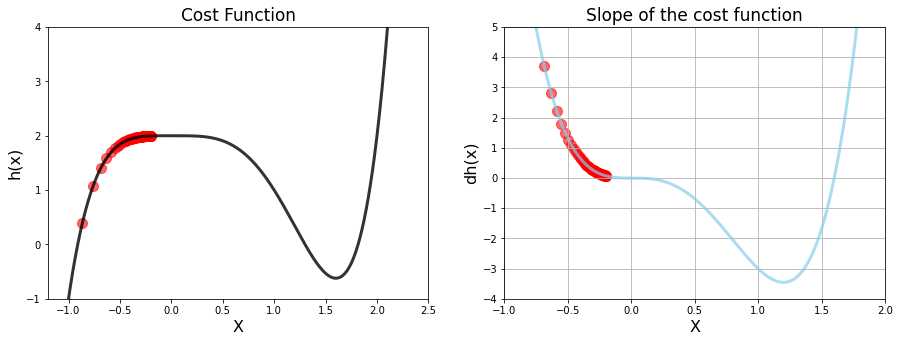

In [19]:

# calling gradient function.
local_min, list_x , deriv_list = gradient_descent(dh,initial_guess= -0.2, max_iter=70)
plt.figure(figsize=[15, 5])

# graph 1 chart 
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_3, h(x_3), color='black', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3, alpha=0.7)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6) 

print('Local min occurs at:', local_min)
print('Cost at this minimum is :', h(local_min))
print('Number of steps:', len(list_x))

In [20]:
import sys
sys.version
sys.float_info.max

1.7976931348623157e+308

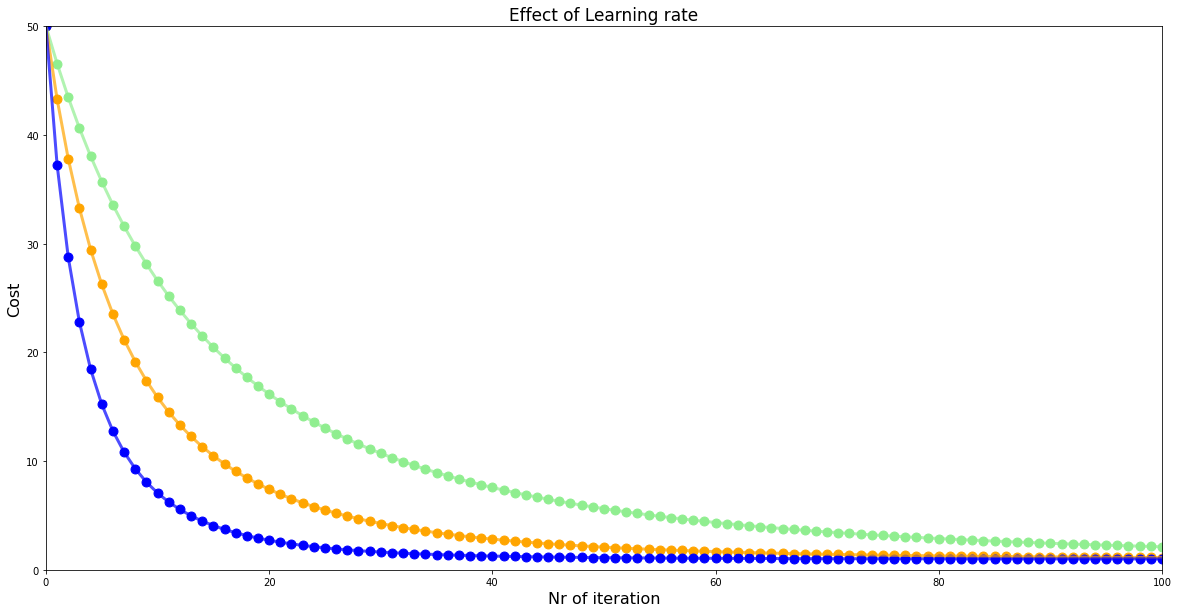

In [21]:
# calling gradient function.
n = 100
low_gamma = gradient_descent(dg, initial_guess= 3, multiplier=0.0005 , max_iter=n, precision=0.0001)
mid_gamma = gradient_descent(dg, initial_guess= 3, multiplier=0.001 , max_iter=n, precision=0.0001)
high_gamma = gradient_descent(dg, initial_guess= 3, multiplier=0.002 , max_iter=n, precision=0.0001)
plt.figure(figsize=[20, 10])

#Experiment 
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25)

# Plotting reduction in cost for each iteration.

plt.xlim(0, n)
plt.ylim( 0, 50)

plt.title('Effect of Learning rate', fontsize=17)
plt.xlabel('Nr of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts 
# 1) Y Axis Data convert the list to numpy arrays
low_values = np.array(low_gamma[1])


# 2) X Axis Data Create a list from 0 to n+1 
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth= 3, alpha=0.7,)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='orange', linewidth= 3, alpha=0.7,)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='orange', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='blue', linewidth= 3, alpha=0.7,)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='blue', s=80)



# Example 4 - Data Viz with 3D Charts
## Minimise $$ (x, y) = \frac{1}{3^(-x^2 - y^2 +1)} $$
### Minimise $$ (x, y) = f\frac{1}{r+1} $$ where $r$ is $3^{-x^2 - y^2} $

In [22]:
def f(x, y):
    r = 3**(-x**2-y**2)
    return 1 / (r + 1)

In [23]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

type(x_4)
print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)
x_4

Shape of X array (200,)
Array after meshgrid: (200, 200)


array([[-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       ...,
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ]])

/var/folders/fy/k18j5frj3ks9kvg79zkzkkv00000gn/T/ipykernel_38906/495204331.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


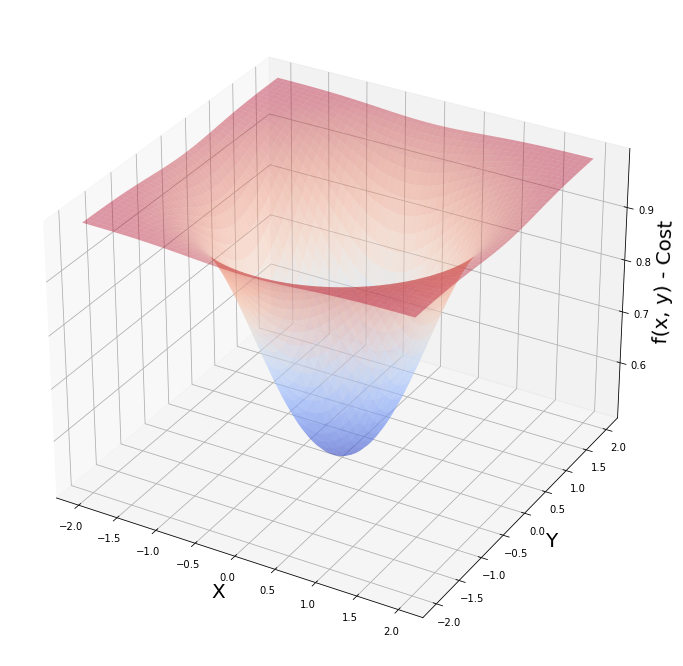

In [24]:
fig = plt.figure(figsize =[16, 12])
ax = fig.gca(projection ='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha = 0.4)
plt.show()

## Partial Dervative & Symblolic Computation 
$$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -  y^2}}{(3^{-x^2 - y^2} + 1)^2}$$ 
$$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -  y^2}}{(3^{-x^2 - y^2} + 1)^2}$$ 

In [40]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is:',f(a, b))
print('Partial derivative wrt x is:' ,(diff(f(a, b), b)))
f(a, b).evalf(subs={a:1.8, b:1.0})
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})
print('Value of partial derivative wrt x:', diff(f(a, b).evalf(subs={a:1.8, b:1.0})))


Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of partial derivative wrt x: 0


## Batch Gradient Descent with SymPy

In [47]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
print('Value in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:' ,f(params[0], params[1]))

Value in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is: 0.500000000000000


In [44]:
# Partial derivative function example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [45]:
fpx(1.8, 1.0)

0.036808971619750504

In [46]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
print('Value in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:' ,f(params[0], params[1]))

Value in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is: 0.5
